### **Python 실데이터 분석**

---
>**목차(Context)**

* Sesson 1 - 육군 신체정보 데이터 활용 Pandas 실습
* Sesson 2 - 개발자 연봉 데이터 활용 데이터 분석, 데이터 시각화 실습
* Sesson 3 - HR 데이터 활용 데이터 분석, 데이터 시각화 실습--> 직접하는것

>**학습목표**
- 육군 신체 정보 데이터를 활용해서 Series 연산 및 데이터 색인 등의 데이터 활용
- kaggle에서 제공하는 개발자 데이터와 Numpy, Pandas, Matplotlibm Seaborn등의 라이브러리를 활용해서 데이터 분석 및 시각화 능력
- HR 데이터를 활용해서 실제 데이터 분석을 해보자


### 육군 신체 정보 데이터 실습
- 육군 신체 정보(키,몸무게)를 활용해서 bmi라는 새로운 정보를 만들어 내보자!

>**진행순서**

0. 필요한 라이브러리 불러오기
1. 데이터 불러오기
2. 데이터 확인
3. 문자 데이터 전처리
4. Series 연산
5. 데이터 추가
6. 결측치 전처리

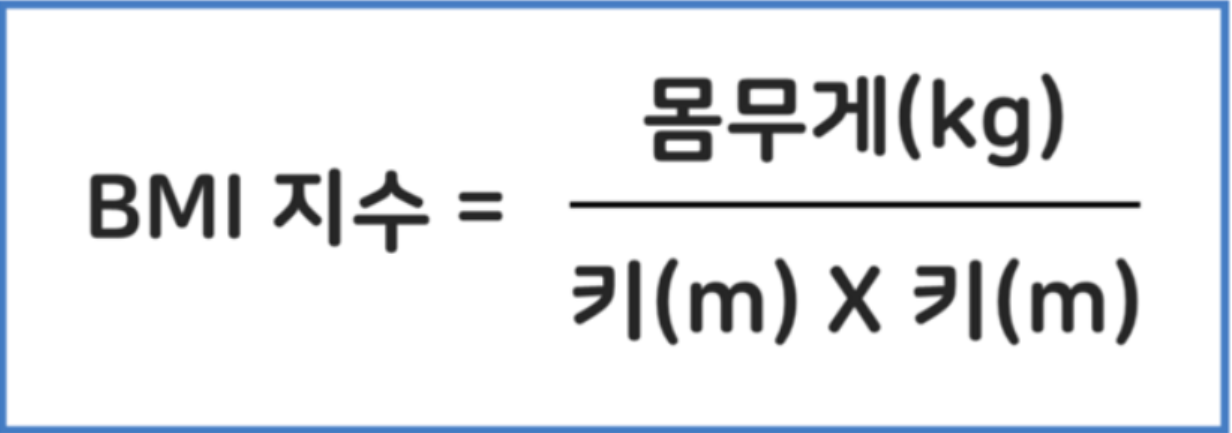

In [1]:
# 0 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. 데이터 불러오기 > 육군 신체정보.CSV
data = pd.read_csv('./data/육군신체측정정보.csv')

C:\Users\smhrd\AppData\Local\Temp\ipykernel_12180\3748079153.py:2: DtypeWarning: Columns (2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/육군신체측정정보.csv')


In [3]:
data

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
1,2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
2,3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
3,4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg
...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167979,167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167980,167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg
167981,167982,20170131,85.3 cm,86.8 cm,173.6 cm,75.9 cm (29.9 in),76.6 cm,57.6 cm,24.3 cm,57.4 kg


In [4]:
# 2. 데이터 확인 : info()
# -> 확인해야 할 것 > 1. 결측치가 있는가? 2. 각 컬럼마다 Dtype은 어떻게 구성이 되어있는지

data.info()
data.isnull().sum()

# 문제 1 : bmi를 구하기 위해서 숫자 데이터의 연산이 필요하지만 object(문자)형태로 Dtype이 저장되어 있기 때문에 숫자연산이 불가능
# 해결책 : object타입을 float 타입으로 형변환

# 문제 2: 제대로 된 연산을 하기 위해서는 모든데이터가 채워져 있어야 하지만 결측치가 존재한다
# 해결책 : 결측치를 채워주거나, 결측치에 해당하는 컬럼을 삭제해줘야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167983 entries, 0 to 167982
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   순번          167983 non-null  int64 
 1   측정 일자       167983 non-null  int64 
 2   가슴 둘레 센티미터  167982 non-null  object
 3   소매길이 센티미터   167983 non-null  object
 4   신장 센티미터     167983 non-null  object
 5   허리 둘레 센티미터  167983 non-null  object
 6   샅높이 센티미터    167983 non-null  object
 7   머리 둘레 센티미터  167981 non-null  object
 8   발 길이 센티미터   167983 non-null  object
 9   몸무게 킬로그램    167983 non-null  object
dtypes: int64(2), object(8)
memory usage: 12.8+ MB


순번            0
측정 일자         0
가슴 둘레 센티미터    1
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
dtype: int64

### **Python 실데이터 분석**

---
>**목차(Context)**

* Sesson 1 - 육군 신체정보 데이터 활용 Pandas 실습
* Sesson 2 - 개발자 연봉 데이터 활용 데이터 분석, 데이터 시각화 실습
* Sesson 3 - HR 데이터 활용 데이터 분석, 데이터 시각화 실습--> 직접하는것

>**학습목표**
- 육군 신체 정보 데이터를 활용해서 Series 연산 및 데이터 색인 등의 데이터 활용
- kaggle에서 제공하는 개발자 데이터와 Numpy, Pandas, Matplotlibm Seaborn등의 라이브러리를 활용해서 데이터 분석 및 시각화 능력
- HR 데이터를 활용해서 실제 데이터 분석을 해보자


### 육군 신체 정보 데이터 실습
- 육군 신체 정보(키,몸무게)를 활용해서 bmi라는 새로운 정보를 만들어 내보자!

>**진행순서**

0. 필요한 라이브러리 불러오기
1. 데이터 불러오기
2. 데이터 확인
3. 문자 데이터 전처리
4. Series 연산
5. 데이터 추가
6. 결측치 전처리

![image.png](attachment:5d520153-db35-4cd2-838a-698e8c89c8d4.png)

In [5]:
# 0 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 1. 데이터 불러오기 > 육군 신체정보.CSV
data = pd.read_csv('./data/육군신체측정정보.csv')

C:\Users\smhrd\AppData\Local\Temp\ipykernel_12180\3748079153.py:2: DtypeWarning: Columns (2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/육군신체측정정보.csv')


In [7]:
data

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
1,2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
2,3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
3,4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg
...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167979,167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167980,167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg
167981,167982,20170131,85.3 cm,86.8 cm,173.6 cm,75.9 cm (29.9 in),76.6 cm,57.6 cm,24.3 cm,57.4 kg


In [8]:
# 2. 데이터 확인 : info()
# -> 확인해야 할 것 > 1. 결측치가 있는가? 2. 각 컬럼마다 Dtype은 어떻게 구성이 되어있는지

data.info()
data.isnull().sum()

# 문제 1 : bmi를 구하기 위해서 숫자 데이터의 연산이 필요하지만 object(문자)형태로 Dtype이 저장되어 있기 때문에 숫자연산이 불가능
# 해결책 : object타입을 float 타입으로 형변환

# 문제 2: 제대로 된 연산을 하기 위해서는 모든데이터가 채워져 있어야 하지만 결측치가 존재한다
# 해결책 : 결측치를 채워주거나, 결측치에 해당하는 컬럼을 삭제해줘야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167983 entries, 0 to 167982
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   순번          167983 non-null  int64 
 1   측정 일자       167983 non-null  int64 
 2   가슴 둘레 센티미터  167982 non-null  object
 3   소매길이 센티미터   167983 non-null  object
 4   신장 센티미터     167983 non-null  object
 5   허리 둘레 센티미터  167983 non-null  object
 6   샅높이 센티미터    167983 non-null  object
 7   머리 둘레 센티미터  167981 non-null  object
 8   발 길이 센티미터   167983 non-null  object
 9   몸무게 킬로그램    167983 non-null  object
dtypes: int64(2), object(8)
memory usage: 12.8+ MB


순번            0
측정 일자         0
가슴 둘레 센티미터    1
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
dtype: int64

In [9]:
# 3. 데이터 전처리
# 3-1 object --> float 형태로 형변환 진행
# 단위 문자 kg, cm 이라는 것을 제거
# replace('바꿔야할 문자', '바꾸고 싶은 문자')

#. str.replace()

height = data['신장 센티미터'].str.replace(' cm','')
weight = data['몸무게 킬로그램'].str.replace(' kg','')
data.head()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
1,2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
2,3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
3,4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg


In [10]:
weight

0         73.2
1         65.1
2         93.2
3         71.6
4         67.1
          ... 
167978    73.7
167979    70.7
167980    78.7
167981    57.4
167982    51.7
Name: 몸무게 킬로그램, Length: 167983, dtype: object

In [11]:
height.dtypes

# astype() 데이터 dtype을 변환해주는 함수

height=height.astype('float64')
weight=weight.astype('float64')

In [12]:
# 몸무기/키*키

In [13]:
h = height*0.01

In [14]:
bmi = weight/ h**2

In [15]:
bmi

0         21.272731
1         23.286726
2         28.797420
3         24.372012
4         21.442077
            ...    
167978    24.568108
167979    25.564359
167980    25.639322
167981    19.046380
167982    16.728338
Length: 167983, dtype: float64

In [16]:
data['bmi'] = bmi.round(2)

In [17]:
data.set_index('순번', inplace=True)

In [18]:
data

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.29
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.37
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44
...,...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg,24.57
167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg,25.56
167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg,25.64


![image.png](attachment:19cf0618-54b3-458d-9d79-226d9735c913.png)

In [19]:
# bmi 가 고도비만인 사람

In [ ]:
big =data[data['bmi']>=30]
big

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.29
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.37
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44
...,...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg,24.57
167980,20170131,97.9,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg,25.56
167981,20170131,97.9,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg,25.64


In [21]:
big['bmi'].count()
#14026

14026

In [22]:
#bmi가 정상체중

In [23]:
data[(data['bmi'] >=18.5) & (data['bmi'] <=23)]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44
9,20140106,93.8,89.3,178.7 cm,82.9,83.8,57.7,28.6,69.7 kg,21.83
13,20140106,83.1,86.0,172.6 cm,75.7,75.4,57.9,26.2,58.6 kg,19.67
14,2013,94.7,85.1,170.7 cm,81.7,75.3,56.4,26.2,66.7 kg,22.89
...,...,...,...,...,...,...,...,...,...,...
167970,20170131,95.9 cm,86.1 cm,172.3 cm,86.0 cm (33.8 in),76.1 cm,58.4 cm,27.6 cm,64.4 kg,21.69
167973,20170131,96.7 cm,85.0 cm,169.4 cm,86.5 cm (34.1 in),74.3 cm,60.7 cm,28.1 cm,60.7 kg,21.15
167974,20170131,84.6 cm,82.8 cm,166.5 cm,78.5 cm (30.9 in),78.2 cm,58.3 cm,27.2 cm,60.8 kg,21.93


In [24]:
data[(data['bmi']>=25) & (data['bmi']<=29.9)]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
15,20140106,97.1,87.7,175.0 cm,87.3,78.9,56.4,27.4,77.8 kg,25.40
16,2013,98.8,87.7,175.8 cm,89.6,77.6,58.5,26.2,77.8 kg,25.17
23,20140106,106.4,90.4,180.1 cm,97.3,84.1,57.8,27.6,90.4 kg,27.87
25,20140106,112.1,93.6,186.8 cm,105.2,88.0,62.0,27.7,103.3 kg,29.60
...,...,...,...,...,...,...,...,...,...,...
167966,20170131,109.6 cm,88.2 cm,176.4 cm,92.4 cm (36.4 in),81.9 cm,58.9 cm,29.7 cm,82.0 kg,26.35
167971,20170131,97.1 cm,85.1 cm,169.9 cm,91.7 cm (36.1 in),78.1 cm,59.0 cm,28.9 cm,73.7 kg,25.53
167975,20170131,97.2 cm,84.2 cm,169.2 cm,90.4 cm (35.6 in),75.0 cm,61.7 cm,29.1 cm,72.4 kg,25.29


In [25]:
# 전처리 3-2 결측치를 전처리
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    1
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [26]:
data.head()

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.29
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.37
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44


In [27]:
# 가슴둘레 널값가진사람 찾기 // 순번이 108401 인사람이 가슴둘레 비어있음
data[data['가슴 둘레 센티미터'].isnull()]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
108401,20160307,NaN,85.9,171.3 cm,91.7,79.0,57.1,25.2,69.5 kg,23.68


In [28]:
# 결측치 처리하는 방법

# 1. 평균값(mean)으로 결측치 체우기(분산이 적은경우) -> 평균값이 많이 안퍼져있을때
# 2. 중앙값으로 결측치를 임의로 채우기 (분산이 클경우)
# 3. 최빈값으로 결측치를 임의로 채우기 (문자or 범주형 데이터인 경우)
# 4. 결측치가 존재하는 데이터를 삭제(결측치 빈도가 다른 컬럼에 비해 빈도가 너무 차이나는 경우)

In [29]:
# 평균 값을 확인하기 위해서 가슴 둘레 센티미터를 형변환

In [30]:
# 'cm'을 제거하는 함수를 만듬
def cm_place(data):
    if type(data)== float:
        return data
    else:
        return data.replace(' cm', '')

In [31]:
# apply() 함수를 통해 사용자 정의 함수를 Series 한 행마다 적용

data['가슴 둘레 센티미터'] = data['가슴 둘레 센티미터'].apply(cm_place).astype('float64')
# 각 행의 cm_replace(사용자 정의 함수)를 적용(cm을 제거하고 숫자만 남김)>> 안에 있는 dtype을 float64형으로 변환

In [32]:
# 가슴 둘레 센티미터의 편균값 확인 >> 95.6
data['가슴 둘레 센티미터'].mean().round(1)

95.6

In [33]:
data[data['가슴 둘레 센티미터'].isnull()]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
108401,20160307,NaN,85.9,171.3 cm,91.7,79.0,57.1,25.2,69.5 kg,23.68


In [34]:
# data['가슴 둘레 센티미터'].fillna(95.6, inplace=True)

# 결측치 위치를 알기 때문에 인덱스 위치찾고 채워도 됨
# data.loc[108401,['가슴 둘레 센티미터']]=95.6

In [35]:
data.loc[108401]

측정 일자         20160307
가슴 둘레 센티미터         NaN
소매길이 센티미터         85.9
신장 센티미터       171.3 cm
허리 둘레 센티미터        91.7
샅높이 센티미터          79.0
머리 둘레 센티미터        57.1
발 길이 센티미터         25.2
몸무게 킬로그램       69.5 kg
bmi              23.68
Name: 108401, dtype: object

In [36]:
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    1
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [37]:
# 머리둘레 센티미터 결측치는 일괄 제거

# dropna() : 존재하는 결측치(NaN)를 일관적으로 제거해주는 함수

data.dropna(inplace = True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167980 entries, 1 to 167983
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   측정 일자       167980 non-null  int64  
 1   가슴 둘레 센티미터  167980 non-null  float64
 2   소매길이 센티미터   167980 non-null  object 
 3   신장 센티미터     167980 non-null  object 
 4   허리 둘레 센티미터  167980 non-null  object 
 5   샅높이 센티미터    167980 non-null  object 
 6   머리 둘레 센티미터  167980 non-null  object 
 7   발 길이 센티미터   167980 non-null  object 
 8   몸무게 킬로그램    167980 non-null  object 
 9   bmi         167980 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 14.1+ MB


In [39]:
# 3. 데이터 전처리
# 3-1 object --> float 형태로 형변환 진행
# 단위 문자 kg, cm 이라는 것을 제거
# replace('바꿔야할 문자', '바꾸고 싶은 문자')

#. str.replace()

height = data['신장 센티미터'].str.replace(' cm','')
weight = data['몸무게 킬로그램'].str.replace(' kg','')
data.head()

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.29
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.37
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44


In [40]:
weight

순번
1         73.2
2         65.1
3         93.2
4         71.6
5         67.1
          ... 
167979    73.7
167980    70.7
167981    78.7
167982    57.4
167983    51.7
Name: 몸무게 킬로그램, Length: 167980, dtype: object

In [41]:
height.dtypes

# astype() 데이터 dtype을 변환해주는 함수

height=height.astype('float64')
weight=weight.astype('float64')

In [42]:
# 몸무기/키*키

In [43]:
h = height*0.01

In [44]:
bmi = weight/ h**2

In [45]:
bmi

순번
1         21.272731
2         23.286726
3         28.797420
4         24.372012
5         21.442077
            ...    
167979    24.568108
167980    25.564359
167981    25.639322
167982    19.046380
167983    16.728338
Length: 167980, dtype: float64

In [46]:
data['bmi'] = bmi.round(2)

In [47]:
data.set_index('순번', inplace=True)

KeyError: "None of ['순번'] are in the columns"

In [ ]:
data

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.29
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.37
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44
...,...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg,24.57
167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg,25.56
167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg,25.64


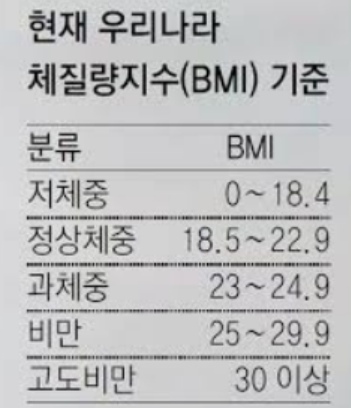

In [ ]:
# bmi 가 고도비만인 사람

In [ ]:
big =data[data['bmi']>=30]

In [ ]:
big['bmi'].count()
#14026

14026

In [ ]:
#bmi가 정상체중

In [ ]:
data[(data['bmi'] >=18.5) & (data['bmi'] <=23)]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44
9,20140106,93.8,89.3,178.7 cm,82.9,83.8,57.7,28.6,69.7 kg,21.83
13,20140106,83.1,86.0,172.6 cm,75.7,75.4,57.9,26.2,58.6 kg,19.67
14,2013,94.7,85.1,170.7 cm,81.7,75.3,56.4,26.2,66.7 kg,22.89
...,...,...,...,...,...,...,...,...,...,...
167970,20170131,95.9 cm,86.1 cm,172.3 cm,86.0 cm (33.8 in),76.1 cm,58.4 cm,27.6 cm,64.4 kg,21.69
167973,20170131,96.7 cm,85.0 cm,169.4 cm,86.5 cm (34.1 in),74.3 cm,60.7 cm,28.1 cm,60.7 kg,21.15
167974,20170131,84.6 cm,82.8 cm,166.5 cm,78.5 cm (30.9 in),78.2 cm,58.3 cm,27.2 cm,60.8 kg,21.93


In [ ]:
data[(data['bmi']>=25) & (data['bmi']<=29.9)]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
15,20140106,97.1,87.7,175.0 cm,87.3,78.9,56.4,27.4,77.8 kg,25.40
16,2013,98.8,87.7,175.8 cm,89.6,77.6,58.5,26.2,77.8 kg,25.17
23,20140106,106.4,90.4,180.1 cm,97.3,84.1,57.8,27.6,90.4 kg,27.87
25,20140106,112.1,93.6,186.8 cm,105.2,88.0,62.0,27.7,103.3 kg,29.60
...,...,...,...,...,...,...,...,...,...,...
167966,20170131,109.6 cm,88.2 cm,176.4 cm,92.4 cm (36.4 in),81.9 cm,58.9 cm,29.7 cm,82.0 kg,26.35
167971,20170131,97.1 cm,85.1 cm,169.9 cm,91.7 cm (36.1 in),78.1 cm,59.0 cm,28.9 cm,73.7 kg,25.53
167975,20170131,97.2 cm,84.2 cm,169.2 cm,90.4 cm (35.6 in),75.0 cm,61.7 cm,29.1 cm,72.4 kg,25.29


In [ ]:
# 전처리 3-2 결측치를 전처리
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    1
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [ ]:
data.head()

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.29
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.37
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44


In [ ]:
# 가슴둘레 널값가진사람 찾기 // 순번이 108401 인사람이 가슴둘레 비어있음
data[data['가슴 둘레 센티미터'].isnull()]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
108401,20160307,NaN,85.9,171.3 cm,91.7,79.0,57.1,25.2,69.5 kg,23.68


In [ ]:
# 결측치 처리하는 방법

# 1. 평균값(mean)으로 결측치 체우기(분산이 적은경우) -> 평균값이 많이 안퍼져있을때
# 2. 중앙값으로 결측치를 임의로 채우기 (분산이 클경우)
# 3. 최빈값으로 결측치를 임의로 채우기 (문자or 범주형 데이터인 경우)
# 4. 결측치가 존재하는 데이터를 삭제(결측치 빈도가 다른 컬럼에 비해 빈도가 너무 차이나는 경우)

In [ ]:
# 평균 값을 확인하기 위해서 가슴 둘레 센티미터를 형변환

In [ ]:
# 'cm'을 제거하는 함수를 만듬
def cm_place(data):
    if type(data)== float:
        return data
    else:
        return data.replace(' cm', '')

In [ ]:
# apply() 함수를 통해 사용자 정의 함수를 Series 한 행마다 적용

data['가슴 둘레 센티미터'] = data['가슴 둘레 센티미터'].apply(cm_place).astype('float64')
# 각 행의 cm_replace(사용자 정의 함수)를 적용(cm을 제거하고 숫자만 남김)>> 안에 있는 dtype을 float64형으로 변환

In [ ]:
# 가슴 둘레 센티미터의 편균값 확인 >> 95.6
data['가슴 둘레 센티미터'].mean().round(1)

95.6

In [ ]:
data[data['가슴 둘레 센티미터'].isnull()]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
순번,,,,,,,,,,
108401,20160307,NaN,85.9,171.3 cm,91.7,79.0,57.1,25.2,69.5 kg,23.68


In [ ]:
# data['가슴 둘레 센티미터'].fillna(95.6, inplace=True)

# 결측치 위치를 알기 때문에 인덱스 위치찾고 채워도 됨
# data.loc[108401,['가슴 둘레 센티미터']]=95.6

In [ ]:
data.loc[108401]

측정 일자         20160307
가슴 둘레 센티미터        95.6
소매길이 센티미터         85.9
신장 센티미터       171.3 cm
허리 둘레 센티미터        91.7
샅높이 센티미터          79.0
머리 둘레 센티미터        57.1
발 길이 센티미터         25.2
몸무게 킬로그램       69.5 kg
bmi              23.68
Name: 108401, dtype: object

In [ ]:
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    0
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [ ]:
# 머리둘레 센티미터 결측치는 일괄 제거

# dropna() : 존재하는 결측치(NaN)를 일관적으로 제거해주는 함수

data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167981 entries, 1 to 167983
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   측정 일자       167981 non-null  int64  
 1   가슴 둘레 센티미터  167981 non-null  float64
 2   소매길이 센티미터   167981 non-null  object 
 3   신장 센티미터     167981 non-null  object 
 4   허리 둘레 센티미터  167981 non-null  object 
 5   샅높이 센티미터    167981 non-null  object 
 6   머리 둘레 센티미터  167981 non-null  object 
 7   발 길이 센티미터   167981 non-null  object 
 8   몸무게 킬로그램    167981 non-null  object 
 9   bmi         167981 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 14.1+ MB
